Tile the original images for batch processing

In [1]:
import skimage
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

load the image

In [2]:
in_img = skio.imread('/lrde/home2/ychen/fine_tuning/BDCN/historical_map_data/test/map_avg_fill.png')
in_img.shape, in_img.dtype

((6500, 8500, 3), dtype('uint8'))

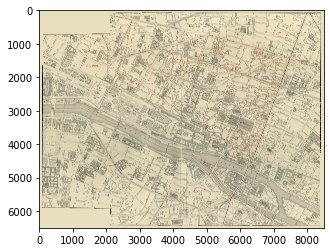

In [3]:
plt.imshow(in_img)

# Pad and tile the images

In [4]:
from skimage.util import view_as_windows

In [5]:
win_size = 500
pad_px = win_size // 2
pad_px

250

In [6]:
img_pad = np.pad(in_img, [(pad_px,pad_px), (pad_px,pad_px), (0,0)], 'edge')
img_pad.shape

(7000, 9000, 3)

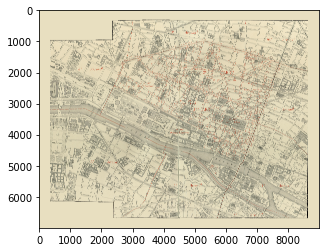

In [7]:
plt.imshow(img_pad)

In [8]:
tiles = view_as_windows(img_pad, (win_size,win_size,3), step=pad_px)
tiles.shape

(27, 35, 1, 500, 500, 3)

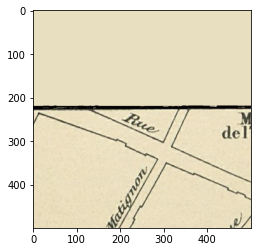

In [9]:
plt.imshow(tiles[3,2,0,...])

# Fake process

In [27]:
tmp_dir = "/lrde/home2/ychen/fine_tuning/BDCN/historical_map_data/test/data_tile"
!mkdir -p $tmp_dir

In [28]:
def process_tiles(tiles, bordersize=100):
    for row in range(tiles.shape[0]):
        for col in range(tiles.shape[1]):
            tt = tiles[row, col, 0, ...].copy()
            # add an annoying border 
            # tt[:bordersize,:, 2] = 255
            # tt[-bordersize:,:, 2] = 255
            # tt[:,:bordersize, 2] = 255
            # tt[:,-bordersize:, 2] = 255
            skio.imsave(os.path.join(tmp_dir, f"t_r{row:02d}_c{col:02d}.jpg"), tt)

In [29]:
process_tiles(tiles)

/lrde/home2/ychen/hist_env_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: /lrde/home2/ychen/fine_tuning/BDCN/results/bdcn_150_fuse/fuse/t_r00_c00.jpg is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
/lrde/home2/ychen/hist_env_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: /lrde/home2/ychen/fine_tuning/BDCN/results/bdcn_150_fuse/fuse/t_r00_c01.jpg is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
/lrde/home2/ychen/hist_env_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: /lrde/home2/ychen/fine_tuning/BDCN/results/bdcn_150_fuse/fuse/t_r00_c02.jpg is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
/lrde/home2/ychen/hist_env_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: /lrde/home2/ychen/fine_tuning/BDCN/results/bdcn_150_fuse/fuse/t_r00_c03.jpg is a low contrast image
  # Remove the CWD from sys.path while we load

In [21]:
!ls $tmp_dir

t_r00_c00.jpg  t_r05_c14.jpg  t_r10_c28.jpg  t_r16_c07.jpg  t_r21_c21.jpg
t_r00_c01.jpg  t_r05_c15.jpg  t_r10_c29.jpg  t_r16_c08.jpg  t_r21_c22.jpg
t_r00_c02.jpg  t_r05_c16.jpg  t_r10_c30.jpg  t_r16_c09.jpg  t_r21_c23.jpg
t_r00_c03.jpg  t_r05_c17.jpg  t_r10_c31.jpg  t_r16_c10.jpg  t_r21_c24.jpg
t_r00_c04.jpg  t_r05_c18.jpg  t_r10_c32.jpg  t_r16_c11.jpg  t_r21_c25.jpg
t_r00_c05.jpg  t_r05_c19.jpg  t_r10_c33.jpg  t_r16_c12.jpg  t_r21_c26.jpg
t_r00_c06.jpg  t_r05_c20.jpg  t_r10_c34.jpg  t_r16_c13.jpg  t_r21_c27.jpg
t_r00_c07.jpg  t_r05_c21.jpg  t_r11_c00.jpg  t_r16_c14.jpg  t_r21_c28.jpg
t_r00_c08.jpg  t_r05_c22.jpg  t_r11_c01.jpg  t_r16_c15.jpg  t_r21_c29.jpg
t_r00_c09.jpg  t_r05_c23.jpg  t_r11_c02.jpg  t_r16_c16.jpg  t_r21_c30.jpg
t_r00_c10.jpg  t_r05_c24.jpg  t_r11_c03.jpg  t_r16_c17.jpg  t_r21_c31.jpg
t_r00_c11.jpg  t_r05_c25.jpg  t_r11_c04.jpg  t_r16_c18.jpg  t_r21_c32.jpg
t_r00_c12.jpg  t_r05_c26.jpg  t_r11_c05.jpg  t_r16_c19.jpg  t_r21_c33.jpg
t_r00_c13.jpg  t_r05_c27.jpg  t_r11_c0

# Reconstruction prediction

In [32]:
tmp_dir = '/lrde/home2/ychen/fine_tuning/BDCN/results/bdcn_150_fuse/fuse/'
in_patches = !ls $tmp_dir | sort -h
in_patches[:10], in_patches[-10:]

(['t_r00_c00.png',
  't_r00_c01.png',
  't_r00_c02.png',
  't_r00_c03.png',
  't_r00_c04.png',
  't_r00_c05.png',
  't_r00_c06.png',
  't_r00_c07.png',
  't_r00_c08.png',
  't_r00_c09.png'],
 ['t_r26_c25.png',
  't_r26_c26.png',
  't_r26_c27.png',
  't_r26_c28.png',
  't_r26_c29.png',
  't_r26_c30.png',
  't_r26_c31.png',
  't_r26_c32.png',
  't_r26_c33.png',
  't_r26_c34.png'])

In [33]:
patches_paths = [os.path.join(tmp_dir, f) for f in in_patches]
patches_paths[:3]

['/lrde/home2/ychen/fine_tuning/BDCN/results/bdcn_150_fuse/fuse/t_r00_c00.png',
 '/lrde/home2/ychen/fine_tuning/BDCN/results/bdcn_150_fuse/fuse/t_r00_c01.png',
 '/lrde/home2/ychen/fine_tuning/BDCN/results/bdcn_150_fuse/fuse/t_r00_c02.png']

In [34]:
len(patches_paths), len(patches_paths)//27

(945, 35)

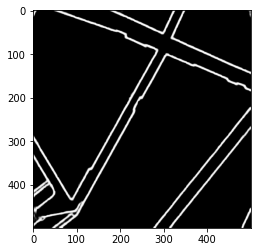

In [36]:
sample_tile = skio.imread(os.path.join(tmp_dir, "t_r04_c02.png"))
plt.imshow(sample_tile)

# Reconstruct

In [37]:
def reconstruct_from_patches(patches_paths, patch_size, step_size, image_size_2d, image_dtype):
    '''Adjust to take patch images directly.
    patch_size is the size of the tiles
    step_size should be patch_size//2
    image_size_2d is the size of the original image
    image_dtype is the data type of the target image
    
    Most of this could be guessed using an array of patches 
    (except step_size but, again, it should be should be patch_size//2)
    '''
    i_h, i_w = np.array(image_size_2d[:2]) + (patch_size, patch_size)
    print(f"tmp img size: {i_h},{i_w}")
    p_h = p_w = patch_size
    img = np.zeros((i_h+p_h//2, i_w+p_w//2, 3), dtype=image_dtype)
    
    numrows = (i_h)//step_size-1
    numcols = (i_w)//step_size-1
    expected_patches = numrows * numcols
    print(f"numrows: {numrows}, numcols: {numcols}, total expected patches: {expected_patches}")
    if len(patches_paths) != expected_patches:
        raise ValueError(f"Expected {expected_patches} patches, got {len(patches_paths)}")
    
    patch_offset = step_size//2
    patch_inner = p_h-step_size
    print(f"patch_offset: {patch_offset}, patch_inner: {patch_inner}")
    
    for row in range(numrows):
        print(f"Row {row}")
        for col in range(numcols):
            tt = skio.imread(patches_paths[row*numcols+col])
            tt_roi = tt[patch_offset:-patch_offset,patch_offset:-patch_offset]
#             print(f"Col {col}")
#             print(row*step_size, row*step_size+patch_inner,
#                 col*step_size, col*step_size+patch_inner)
            img[row*step_size:row*step_size+patch_inner,
                col*step_size:col*step_size+patch_inner] = tt_roi # +1??

    return img[step_size//2:-(patch_size+step_size//2),step_size//2:-(patch_size+step_size//2),...]

In [38]:
# This seems wrong
# # WARNING we need to use the padded image size, it will be cropped later
# new_img = reconstruct_from_patches(patches_paths, win_size, pad_px, img_pad.shape, np.uint8)
# new_img.shape

In [48]:
from PIL import Image
new_img = reconstruct_from_patches(patches_paths, win_size, pad_px, in_img.shape, np.uint8)
new_img.shape
new_img = Image.fromarray(new_img).convert('RGB')
new_img.save('/lrde/home2/ychen/fine_tuning/BDCN/results/bdcn_150_fuse/contour_prob_tile_optimize.png')

tmp img size: 7000,9000
numrows: 27, numcols: 35, total expected patches: 945
patch_offset: 125, patch_inner: 250
Row 0
Row 1
Row 2
Row 3
Row 4
Row 5
Row 6
Row 7
Row 8
Row 9
Row 10
Row 11
Row 12
Row 13
Row 14
Row 15
Row 16
Row 17
Row 18
Row 19
Row 20
Row 21
Row 22
Row 23
Row 24
Row 25
Row 26


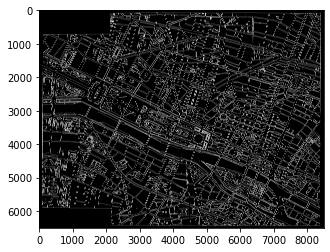

In [40]:
plt.imshow(new_img)

In [41]:
diff_img = np.abs(np.int16(in_img)-np.int16(new_img).astype(np.uint8))
diff_img.max()

255

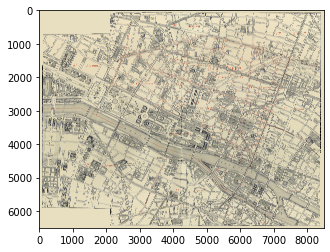

In [42]:
plt.imshow(np.abs(np.int16(in_img)-np.int16(new_img).astype(np.uint8)))

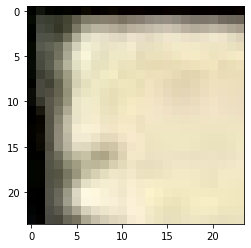

In [43]:
plt.imshow(in_img[96:120,2115:2139])

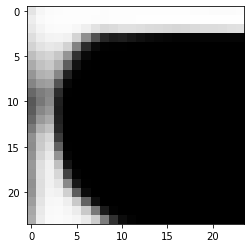

In [44]:
plt.imshow(new_img[96:120,2115:2139])

Realignment is good.

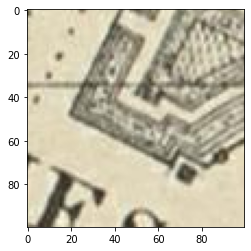

In [45]:
plt.imshow(in_img[3000:3100,3000:3100])

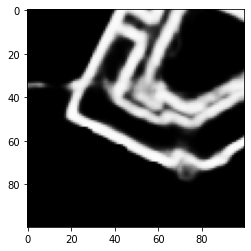

In [46]:
plt.imshow(new_img[3000:3100,3000:3100])

The difference is due to the jpeg compression used to save the tiles in the fake process here.